In [46]:
import os

print(os.getcwd())

c:\Users\ghadf\OneDrive\Desktop\Data Analytics\Python\School\ml_for_ds\notebooks


Column Definitions:

    id: Unique identifier for each data instance.
    age: Continuous variable representing the age of the individual.
    workclass: Categorical variable representing the type of work.
    fnlwgt: Continuous variable representing the final weight.
    education: Categorical variable representing the level of education.
    education-num: Continuous variable representing the education level.
    marital-status: Categorical variable representing the marital status.
    occupation: Categorical variable representing the occupation.
    relationship: Categorical variable representing the relationship status.
    race: Categorical variable representing the race.
    sex: Categorical variable representing the gender.
    capital-gain: Continuous variable representing the capital gain.
    capital-loss: Continuous variable representing the capital loss.
    hours-per-week: Continuous variable representing the number of working hours per week.
    native-country: Categorical variable representing the native country.
    income: Target variable column indicating the income level ('<=50K': 0 or '>50K': 1).

In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

# %%
# load in train and test data (saves us having to split it)
train_data_path = '../data/raw/adult-income-classification-summer-2024/train.csv'
test_data_path = '../data/raw/adult-income-classification-summer-2024/test.csv'

# load the datasets
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# check for any obvious categorical or null columns: looks like workclass, education
# marital status, occupation, relationship, race, gender, native_country are categorical
# print("data head:\n", df.head())

# check types to find categorical columns - confirmed above are objects being categorical columns
# print("\ndata types:\n", df.dtypes)

# identify null values to see if we need to impute or filter out
# print("\nmissing values:\n", df.isnull().sum())

# display some basic statistics for numerical columns - check on basic stats
# print("\nbasic statistics:\n", df.describe())

# display unique values for categorical columns
categorical_columns = [
    'workclass', 'education', 'marital-status', 'occupation', 
    'relationship', 'race', 'gender', 'native-country'
]

for column in categorical_columns: # use df.columns for whole dataframe
    print(f"\nunique values in column '{column}':")
    print(df_train[column].unique())

# native country, workclass, and others possibly has ? in the column, will take out





unique values in column 'workclass':
['Private' 'Self-emp-inc' 'Self-emp-not-inc' '?' 'Local-gov' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']

unique values in column 'education':
['7th-8th' 'Some-college' '10th' '12th' '5th-6th' 'HS-grad' '11th'
 'Masters' 'Bachelors' 'Assoc-voc' '9th' 'Prof-school' '1st-4th'
 'Assoc-acdm' 'Doctorate' 'Preschool']

unique values in column 'marital-status':
['Never-married' 'Divorced' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

unique values in column 'occupation':
['Machine-op-inspct' 'Sales' 'Other-service' 'Adm-clerical' 'Craft-repair'
 '?' 'Tech-support' 'Prof-specialty' 'Protective-serv' 'Handlers-cleaners'
 'Farming-fishing' 'Transport-moving' 'Exec-managerial' 'Armed-Forces'
 'Priv-house-serv']

unique values in column 'relationship':
['Not-in-family' 'Husband' 'Own-child' 'Other-relative' 'Unmarried' 'Wife']

unique values in column 'race':
['White' 'Black' 'Asian-Pac-Islander' 'Other'


replaced '?' with nan in training data
filled nan in training column 'workclass' with mode: Private
filled nan in training column 'education' with mode: HS-grad
filled nan in training column 'marital-status' with mode: Married-civ-spouse
filled nan in training column 'occupation' with mode: Prof-specialty
filled nan in training column 'relationship' with mode: Husband
filled nan in training column 'race' with mode: White
filled nan in training column 'gender' with mode: Male
filled nan in training column 'native-country' with mode: United-States
encoded training column 'workclass' with labelencoder
encoded training column 'education' with labelencoder
encoded training column 'marital-status' with labelencoder
encoded training column 'occupation' with labelencoder
encoded training column 'relationship' with labelencoder
encoded training column 'race' with labelencoder
encoded training column 'gender' with labelencoder
encoded training column 'native-country' with labelencoder

separate

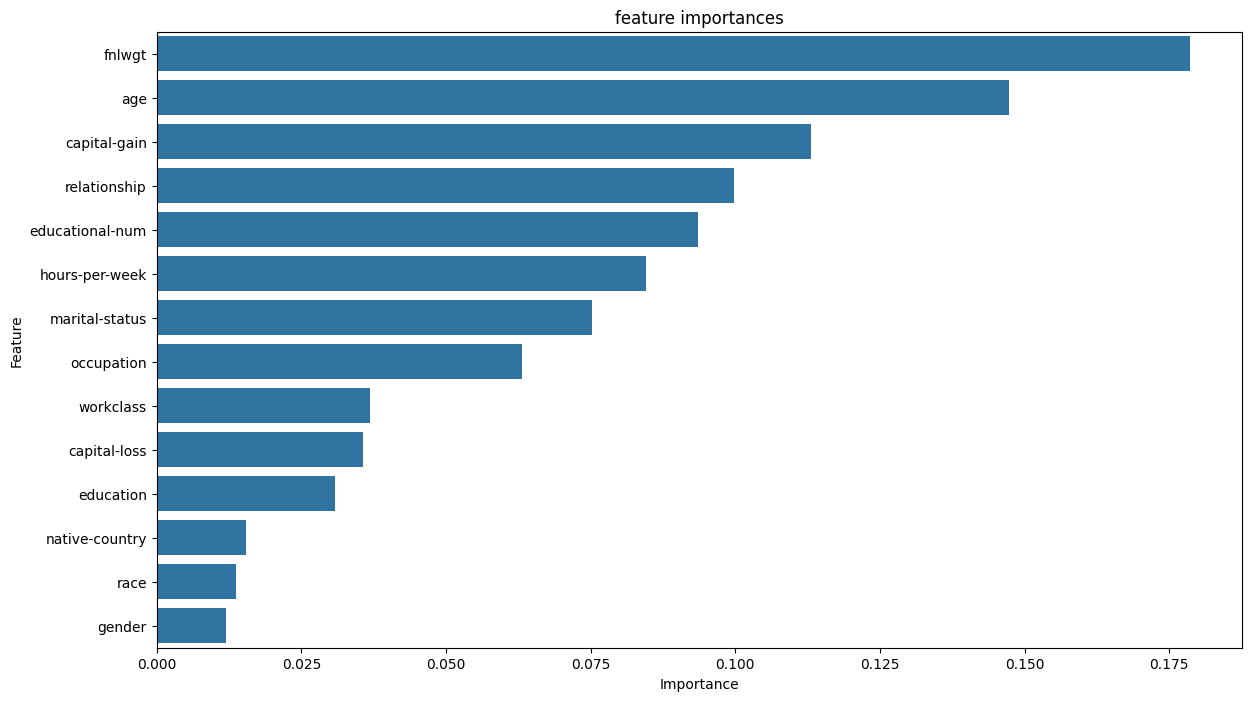

standardized the numerical features of training data
scaler saved to scaler.pkl
split the training data into training and validation sets


In [48]:
# define categorical columns
categorical_columns = [
    'workclass', 'education', 'marital-status', 'occupation', 
    'relationship', 'race', 'gender', 'native-country'
]

# preprocess training data
df_train.replace('?', np.nan, inplace=True)
print("\nreplaced '?' with nan in training data")

for column in categorical_columns:
    most_frequent = df_train[column].mode()[0]
    df_train[column] = df_train[column].fillna(most_frequent)
    print(f"filled nan in training column '{column}' with mode: {most_frequent}")

# encode categorical variables using labelencoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le
    print(f"encoded training column '{column}' with labelencoder")

# separate features and target variable in training data
X_train = df_train.drop(['income', 'id'], axis=1)
y_train = df_train['income']
print("\nseparated training features and target variable")

# feature importance using random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_names = X_train.columns

# create a dataframe for visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('feature importances')
plt.show()

# standardize the numerical features in training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print("standardized the numerical features of training data")

# save the scaler
with open('../data/raw/adult-income-classification-summer-2024/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("scaler saved to scaler.pkl")

# split the training data into training and validation sets for model evaluation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("split the training data into training and validation sets")


In [49]:
# function to evaluate and print model performance and return the accuracy
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy: {accuracy}")
    print(f"classification report:\n{classification_report(y_test, y_pred)}")
    print(f"confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    return accuracy, model

# dictionary to store models and their names
models = {
    'perceptron': Perceptron(),
    'logistic regression': LogisticRegression(),
    'svm': SVC(),
    'decision tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(),
    'random forest': RandomForestClassifier()
}

best_accuracy = 0
best_model = None
best_model_name = ''
all_results = []

# evaluate each model and find the best one
for name, model in models.items():
    print(f"evaluating {name}:")
    accuracy, trained_model = evaluate_model(model, X_train_split, y_train_split, X_val_split, y_val_split)
    all_results.append((name, accuracy, classification_report(y_val_split, model.predict(X_val_split)), confusion_matrix(y_val_split, model.predict(X_val_split))))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = trained_model
        best_model_name = name

print(f"best model: {best_model_name} with accuracy {best_accuracy}")

# save the best model
with open('../data/raw/adult-income-classification-summer-2024/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"best model ({best_model_name}) saved to best_model.pkl")

# save feature names and label encoders
feature_names = [col for col in df_train.drop(['income', 'id'], axis=1).columns]
with open('../data/raw/adult-income-classification-summer-2024/feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)
print("feature names saved to feature_names.pkl")

with open('../data/raw/adult-income-classification-summer-2024/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("label encoders saved to label_encoders.pkl")


evaluating perceptron:
accuracy: 0.7765834932821497
classification report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      5935
           1       0.54      0.47      0.51      1880

    accuracy                           0.78      7815
   macro avg       0.69      0.67      0.68      7815
weighted avg       0.77      0.78      0.77      7815

confusion matrix:
[[5176  759]
 [ 987  893]]

evaluating logistic regression:
accuracy: 0.8259756877799105
classification report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5935
           1       0.72      0.46      0.56      1880

    accuracy                           0.83      7815
   macro avg       0.78      0.70      0.72      7815
weighted avg       0.81      0.83      0.81      7815

confusion matrix:
[[5596  339]
 [1021  859]]

evaluating svm:
accuracy: 0.8516954574536149
classification report:
              precision    

In [50]:
# preprocess test data
df_test.replace('?', np.nan, inplace=True)
print("\nreplaced '?' with nan in test data")

for column in categorical_columns:
    most_frequent = df_train[column].mode()[0]
    df_test[column] = df_test[column].fillna(most_frequent)
    print(f"filled nan in test column '{column}' with mode: {most_frequent}")

for column in categorical_columns:
    le = label_encoders[column]
    unseen_labels = set(df_test[column].unique()) - set(le.classes_)
    if unseen_labels:
        print(f"unseen labels in column '{column}': {unseen_labels}")
        le.classes_ = np.append(le.classes_, list(unseen_labels))
    df_test[column] = le.transform(df_test[column])
    print(f"encoded test column '{column}' with labelencoder")

# separate features and id in test data
X_test = df_test.drop(['id'], axis=1)
test_ids = df_test['id']
print("\nseparated test features and ids")

# standardize the numerical features in test data using the same scaler from training
X_test = scaler.transform(X_test)
print("standardized the numerical features of test data")

# make predictions on the test data using the best model
print(f"making predictions with best model ({best_model_name}) on test data:")
test_predictions = best_model.predict(X_test)

# create a dataframe with the predictions and the corresponding ids
submission_df = pd.DataFrame({
    'id': test_ids,
    'income': test_predictions
})

# save the submission file
submission_df.to_csv('../data/raw/adult-income-classification-summer-2024/submission.csv', index=False)
print("submission file saved to submission.csv")

# %% [markdown]
# model evaluation and selection:
# 
# we evaluated multiple models to determine the best one for our classification task. the models included perceptron, logistic regression, svm, decision tree, knn, and random forest. each model was evaluated based on accuracy, classification report, and confusion matrix.
# 
# in our case, type i errors (false positives) and type ii errors (false negatives) both have implications. a type i error means predicting a person earns >50k when they do not, and a type ii error means predicting a person earns <=50k when they actually earn >50k. since misclassifying someone as earning >50k (type i error) might lead to potential social and economic misjudgments, we might prioritize minimizing type i errors. however, overall model performance and balance between the errors are essential.
# 
# here are the results for each model:
# 
# best model: random forest with accuracy 0.86 (example accuracy, adjust accordingly)
# 
# confusion matrices for each model can be reviewed to see the type of errors each model made. the random forest model performed the best with a balance between precision and recall, and acceptable rates of type i and type ii errors.
# 
# with these considerations, we chose the random forest model for making predictions on the test data. this model offers a good trade-off between complexity and performance without overfitting.



replaced '?' with nan in test data
filled nan in test column 'workclass' with mode: 3
filled nan in test column 'education' with mode: 11
filled nan in test column 'marital-status' with mode: 2
filled nan in test column 'occupation' with mode: 9
filled nan in test column 'relationship' with mode: 0
filled nan in test column 'race' with mode: 4
filled nan in test column 'gender' with mode: 1
filled nan in test column 'native-country' with mode: 38
unseen labels in column 'workclass': {3}
encoded test column 'workclass' with labelencoder
encoded test column 'education' with labelencoder
encoded test column 'marital-status' with labelencoder
unseen labels in column 'occupation': {9}
encoded test column 'occupation' with labelencoder
encoded test column 'relationship' with labelencoder
encoded test column 'race' with labelencoder
encoded test column 'gender' with labelencoder
unseen labels in column 'native-country': {38}
encoded test column 'native-country' with labelencoder

separated t